<h3> Extracting protein sequences' features using ProtBert-BFD pretrained-model <h3>

In [1]:
import torch
from datasets import Dataset, load_dataset
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import skimage.measure
import matplotlib.pyplot as plt
import skimage.measure
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
dataset = load_dataset("EvaKlimentova/Diffusion-all_knots")['train']

Using custom data configuration EvaKlimentova--Diffusion-all_knots-f1f7b10e1861ce17
Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___parquet/EvaKlimentova--Diffusion-all_knots-f1f7b10e1861ce17/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataset = pd.DataFrame(dataset)
features = dataset.drop(columns=['ID', 'Sequence', 'Label', 'Tool'])

In [5]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(features.to_numpy())
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.080s...
[t-SNE] Computed neighbors for 15000 samples in 1.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for sam

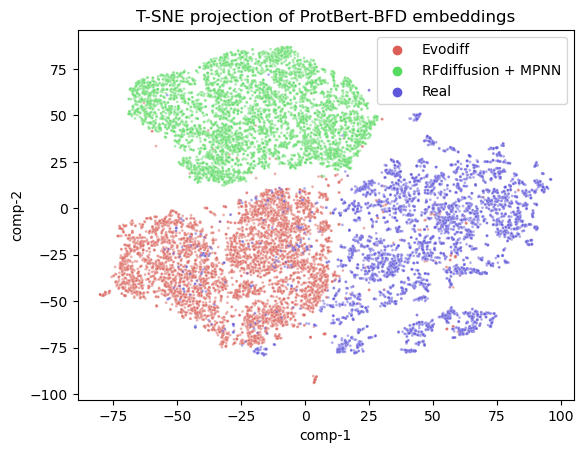

In [6]:
sns.scatterplot(x="comp-1", y="comp-2", hue=map(lambda x: x.replace('RFdiffusion', 'RFdiffusion + MPNN'),dataset['Tool'].tolist()),
                palette=sns.color_palette("hls", 3),
                data=df, alpha=0.5, s=4).set(title="T-SNE projection of ProtBert-BFD embeddings")
plt.savefig('tsne_tools.png', dpi=300)

In [7]:
def plot_tsne(features, labels, title='T-SNE projection of embeddings', save=None):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(features.to_numpy())
    df = pd.DataFrame()
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]
    
    sns.scatterplot(x="comp-1", y="comp-2", hue=map(lambda x: 'knotted' if x==1 else 'unknotted', labels.tolist()),
                palette=['#377eb8', '#ff7f00'],#sns.color_palette("hls", 2),
                data=df, alpha=0.5, s=8).set(title=title)
    if save:
        plt.savefig(save, dpi=300)
    else:
        plt.show()

Evodiff

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.027s...
[t-SNE] Computed neighbors for 5000 samples in 0.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.100446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.365799
[t-SNE] KL divergence after 1000 iterations: 1.893342


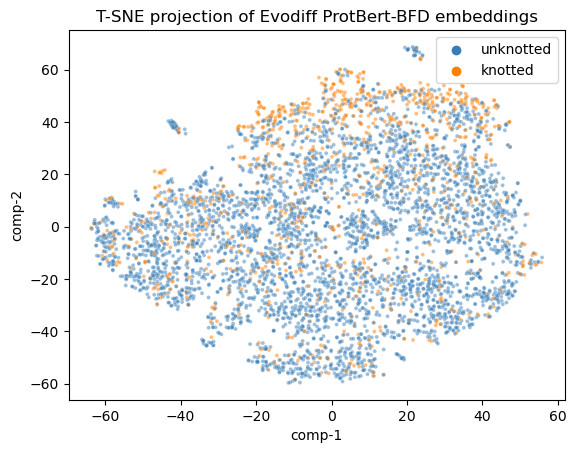

In [8]:
e = dataset[dataset['Tool'] == 'Evodiff']
plot_tsne(e.drop(columns=['ID', 'Sequence', 'Label', 'Tool']), e['Label'], 'T-SNE projection of Evodiff ProtBert-BFD embeddings', save='tsne_evodiff.png')

RFdiffusion + MPNN

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.027s...
[t-SNE] Computed neighbors for 5000 samples in 0.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.065721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.012566
[t-SNE] KL divergence after 1000 iterations: 1.842541


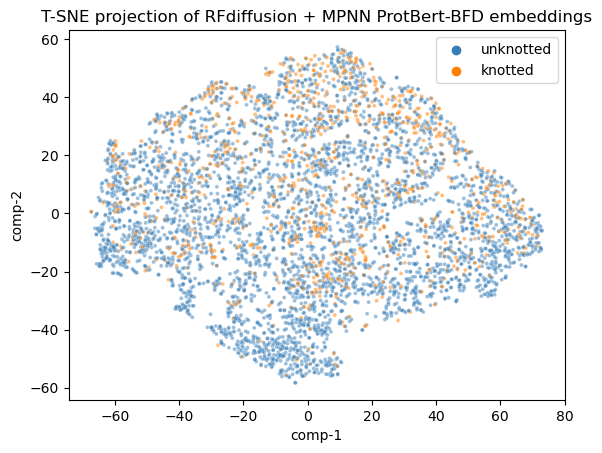

In [10]:
rf = dataset[dataset['Tool'] == 'RFdiffusion']
plot_tsne(rf.drop(columns=['ID', 'Sequence', 'Label', 'Tool']), rf['Label'], 'T-SNE projection of RFdiffusion + MPNN ProtBert-BFD embeddings', save='tsne_rf.png')

Real proteins

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.026s...
[t-SNE] Computed neighbors for 5000 samples in 0.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.112809
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.100227
[t-SNE] KL divergence after 1000 iterations: 1.229397


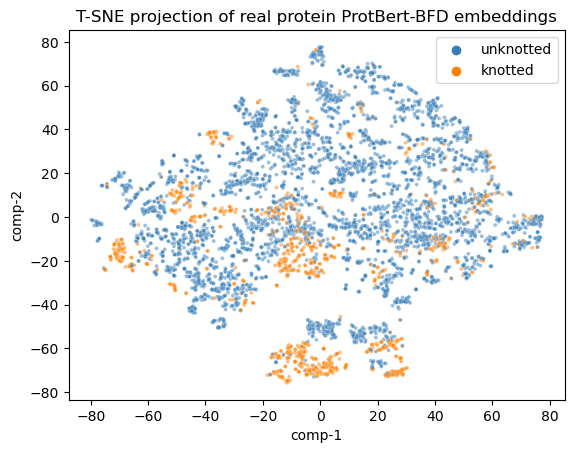

In [11]:
r = dataset[dataset['Tool'] == 'Real']
plot_tsne(r.drop(columns=['ID', 'Sequence', 'Label', 'Tool']), r['Label'], 'T-SNE projection of real protein ProtBert-BFD embeddings', save='tsne_real.png')